# Decision Tree with HR-Employee-Attrition dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../dataset/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum().any() # no null values

False

In [6]:
# Convert Yes or No categories into 1 and 0 for modeling purposes
# Dummy coding

In [7]:
df['Attrition_ind'] = 0
df.loc[df['Attrition'] == 'Yes', 'Attrition_ind'] = 1

In [8]:
df.nunique() # Get the no. of unique values of each variables

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
# We can ignore the four variables as they do not change across the observations
to_ignore = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'Attrition_ind']

In [10]:
discrete_columns, continuous_columns = [], []
for i, j in enumerate(df.dtypes):
    if j == object:
        discrete_columns.append(df.columns[i])
    else:
        continuous_columns.append(df.columns[i])

In [11]:
print("Discrete: \n", discrete_columns, '\n\n', "Continuous: \n", continuous_columns, sep='')

Discrete: 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Continuous: 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind']


In [12]:
dummy_busnstrvl = pd.get_dummies(df['BusinessTravel'], prefix='busns_trvl')
dummy_dept = pd.get_dummies(df['Department'], prefix='dept')
dummy_edufield = pd.get_dummies(df['EducationField'], prefix='edufield')
dummy_gender = pd.get_dummies(df['Gender'], prefix='gender')
dummy_jobrole = pd.get_dummies(df['JobRole'], prefix='jobrole')
dummy_maritstat = pd.get_dummies(df['MaritalStatus'], prefix='maritalstat')
dummy_overtime = pd.get_dummies(df['OverTime'], prefix='overtime')

In [13]:
to_ignore_continuous = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Attrition_ind']

In [14]:
continuous_columns = [x for x in continuous_columns if x not in to_ignore_continuous] # list comprehension

In [15]:
print(continuous_columns, sep='')

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [16]:
df_continuous = df[continuous_columns]

In [17]:
df_new = pd.concat([dummy_busnstrvl, dummy_dept, dummy_edufield, dummy_gender,
                   dummy_jobrole, dummy_maritstat, dummy_overtime, df_continuous,
                   df['Attrition_ind']], axis=1)
# Multi-collinearity does not create a problem in decision trees as opposed to logistic or linear regression,
# hence there is no need to remove any extra derived categorical dummy variable

In [18]:
X = df_new.iloc[:, :-1]
y = df_new['Attrition_ind']

In [19]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Lets train our data with Decision tree classifier

In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# parameters selected for DT classifier
# criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1
dt_fit = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_fit.fit(X_train, y_train)

print("Decision Tree - Train Confusion Matrix\n\n", pd.crosstab(y_train, dt_fit.predict(X_train),
                                                               rownames=['Actuall'], colnames=['Predicted']), sep='')

from sklearn.metrics import accuracy_score, classification_report
print("\nDecision Tree - Train accuracy\n\n", round(accuracy_score(y_train, dt_fit.predict(X_train)), 3))
print("\nDecision Tree - Train Classification Report\n", classification_report(y_train, dt_fit.predict(X_train)))

print("\n\nDecision Tree - Test Confusion Matrix\n\n", pd.crosstab(y_test, dt_fit.predict(X_test),
                                                                  rownames=['Actuall'], colnames=['Predicted']), sep='')
print("\nDecision Tree - Test accuracy", round(accuracy_score(y_test, dt_fit.predict(X_test)), 3))
print("\nDecision Tree - Test Classification Report\n", classification_report(y_test, dt_fit.predict(X_test)))

Decision Tree - Train Confusion Matrix

Predicted    0   1
Actuall           
0          844   9
1           98  78

Decision Tree - Train accuracy

 0.896

Decision Tree - Train Classification Report
              precision    recall  f1-score   support

          0       0.90      0.99      0.94       853
          1       0.90      0.44      0.59       176

avg / total       0.90      0.90      0.88      1029



Decision Tree - Test Confusion Matrix

Predicted    0   1
Actuall           
0          361  19
1           49  12

Decision Tree - Test accuracy 0.846

Decision Tree - Test Classification Report
              precision    recall  f1-score   support

          0       0.88      0.95      0.91       380
          1       0.39      0.20      0.26        61

avg / total       0.81      0.85      0.82       441



In [21]:
classification_report(y_test, dt_fit.predict(X_test)).split()

['precision',
 'recall',
 'f1-score',
 'support',
 '0',
 '0.88',
 '0.95',
 '0.91',
 '380',
 '1',
 '0.39',
 '0.20',
 '0.26',
 '61',
 'avg',
 '/',
 'total',
 '0.81',
 '0.85',
 '0.82',
 '441']

By carefully observing the results, we can infer that, even though the test accuracy is high
(84.6%), the precision and recall of one category (Attrition = Yes) is low (precision = 0.39 and
recall = 0.20). This could be a serious issue when management tries to use this model to
provide some extra benefits proactively to the employees with a high chance of attrition
prior to actual attrition, as this model is unable to identify the real employees who will be
leaving. Hence, we need to look for other modifications; one way is to control the model by
using class weights. By utilizing class weights, we can increase the importance of a
particular class at the cost of an increase in other errors.

For example, by increasing class weight to category 1, we can identify more employees with
the characteristics of actual attrition, but by doing so, we will mark some of the nonpotential
churner employees as potential attriters (which should be acceptable).

Another classical example of the important use of class weights is, in banking scenarios.
When giving loans, it is better to reject some good applications than accepting bad loans.
Hence, even in this case, it is a better idea to use higher weightage to defaulters over nondefaulters:

## Tuning class weights in decision tree classifier

In [22]:
import numpy as np
dummyarray = np.empty((6, 10))
dt_wttune = pd.DataFrame(dummyarray)
# class weights are tuned to see the performance change in decision 
# trees with the same parameters. A dummy DataFrame is created to save all the results of
# various precision-recall details of combinations:

Metrics to be considered for capture are weight for zero and one category (for example, if
the weight for zero category given is 0.2, then automatically, weight for the one should be
0.8, as total weight should be equal to 1), training and testing accuracy, precision for zero
category, one category, and overall. Similarly, recall for zero category, one category, and
overall are also calculated:

In [23]:
dt_wttune.columns = ['zero_wght', 'one_wght', 'tr_accuracy',
                    'tst_accuracy', 'prec_zero', 'prec_one', 'prec_ovll',
                    'recl_zero', 'recl_one', 'recl_ovll']

# Weights for the zero category are verified from 0.01 to 0.5, as we know we do not want to
# explore cases where the zero category will be given higher weightage than one category:
zero_clwghts = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for i in range(len(zero_clwghts)):
    clwght = {0: zero_clwghts[i], 1:1.0-zero_clwghts[i]}
    dt_fit = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2,
                                   min_samples_leaf=1, random_state=42, class_weight=clwght)
    dt_fit.fit(X_train, y_train)
    dt_wttune.loc[i, 'zero_wght'] = clwght[0]
    dt_wttune.loc[i, 'one_wght'] = clwght[1]
    dt_wttune.loc[i, 'tr_accuracy'] = round(accuracy_score(y_train, dt_fit.predict(X_train)), 3)
    dt_wttune.loc[i, 'tst_accuracy'] = round(accuracy_score(y_test, dt_fit.predict(X_test)), 3)
    clf_sp = classification_report(y_test, dt_fit.predict(X_test)).split()
    dt_wttune.loc[i, 'prec_zero'] = float(clf_sp[5])
    dt_wttune.loc[i, 'prec_one'] = float(clf_sp[10])
    dt_wttune.loc[i, 'prec_ovll'] = float(clf_sp[17])
    dt_wttune.loc[i, 'recl_zero'] = float(clf_sp[6])
    dt_wttune.loc[i, 'recl_one'] = float(clf_sp[11])
    dt_wttune.loc[i, 'recl_ovll'] = float(clf_sp[18])
    print("\nClass Weights", clwght, "Train accuracy:",
         round(accuracy_score(y_train, dt_fit.predict(X_train)), 3),
         "Test accuracy:", round(accuracy_score(y_test, dt_fit.predict(X_test)), 3))
    
    print("Test Confusion Matrix\n\n", pd.crosstab(y_test, dt_fit.predict(X_test),
                                                  rownames=['Actual'], colnames=['Predicted']), sep='')


Class Weights {0: 0.01, 1: 0.99} Train accuracy: 0.342 Test accuracy: 0.272
Test Confusion Matrix

Predicted   0    1
Actual            
0          65  315
1           6   55

Class Weights {0: 0.1, 1: 0.9} Train accuracy: 0.806 Test accuracy: 0.732
Test Confusion Matrix

Predicted    0   1
Actual            
0          282  98
1           20  41

Class Weights {0: 0.2, 1: 0.8} Train accuracy: 0.871 Test accuracy: 0.83
Test Confusion Matrix

Predicted    0   1
Actual            
0          341  39
1           36  25

Class Weights {0: 0.3, 1: 0.7} Train accuracy: 0.881 Test accuracy: 0.839
Test Confusion Matrix

Predicted    0   1
Actual            
0          345  35
1           36  25

Class Weights {0: 0.4, 1: 0.6} Train accuracy: 0.894 Test accuracy: 0.832
Test Confusion Matrix

Predicted    0   1
Actual            
0          346  34
1           40  21

Class Weights {0: 0.5, 1: 0.5} Train accuracy: 0.896 Test accuracy: 0.846
Test Confusion Matrix

Predicted    0   1
Actual      

From the preceding screenshot, we can seen that at class weight values of 0.3 (for zero) and
0.7 (for one) it is identifying a higher number of attriters (25 out of 61) without
compromising test accuracy 83.9% using decision trees methodology:

In [24]:
dt_wttune

zero_wght  one_wght  tr_accuracy  tst_accuracy  prec_zero  prec_one  \
0       0.01      0.99        0.342         0.272       0.92      0.15   
1       0.10      0.90        0.806         0.732       0.93      0.29   
2       0.20      0.80        0.871         0.830       0.90      0.39   
3       0.30      0.70        0.881         0.839       0.91      0.42   
4       0.40      0.60        0.894         0.832       0.90      0.38   
5       0.50      0.50        0.896         0.846       0.88      0.39   

   prec_ovll  recl_zero  recl_one  recl_ovll  
0       0.81       0.17      0.90       0.27  
1       0.85       0.74      0.67       0.73  
2       0.83       0.90      0.41       0.83  
3       0.84       0.91      0.41       0.84  
4       0.83       0.91      0.34       0.83  
5       0.81       0.95      0.20       0.85

# Bagging Classifier over single DT

In bagging, we build a number of decision trees on bootstrapped
samples from training data, but the one big drawback with the bagging technique is that it
selects all the variables.

In [26]:
# Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_fit = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42,
                               class_weight={0:0.3, 1:0.7})
bag_fit = BaggingClassifier(base_estimator=dt_fit, n_estimators=5000, max_samples=0.67,
                           max_features=1.0, bootstrap=True,
                           bootstrap_features=False, n_jobs=-1, random_state=42)
bag_fit.fit(X_train, y_train)

bag_pred = bag_fit.predict(X_train)
print("\nBagging - Train Confusion Matrix\n\n", pd.crosstab(y_train, bag_pred,
                                                           rownames=['Actuall'], colnames=['Predicted']))
print('\nBagging - Train accuracy', round(accuracy_score(y_train, bag_pred), 3))
print('\nBagging - Train Classification Report\n', classification_report(y_train, bag_pred))

bag_pred = bag_fit.predict(X_test)
print('\n\nBagging - Test Confusion Matrix\n\n', pd.crosstab(y_test, bag_pred,
                                                            rownames=['Actuall'], colnames=['Predicted']))
print('\nBagging - Test accuracy', round(accuracy_score(y_test, bag_pred), 3))
print('\nBagging - Test Classification Report\n', classification_report(y_test, bag_pred))


Bagging - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          846    7
1           66  110

Bagging - Train accuracy 0.929

Bagging - Train Classification Report
              precision    recall  f1-score   support

          0       0.93      0.99      0.96       853
          1       0.94      0.62      0.75       176

avg / total       0.93      0.93      0.92      1029



Bagging - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          372   8
1           49  12

Bagging - Test accuracy 0.871

Bagging - Test Classification Report
              precision    recall  f1-score   support

          0       0.88      0.98      0.93       380
          1       0.60      0.20      0.30        61

avg / total       0.84      0.87      0.84       441



Given the confusion matrix for test data, we can see the no. of false positive (the number of 0 classified as 1 significantly reduced to 8 compared with 19 in DT)

Overall, Bagging improves performance over the single tree

# Random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_fit = RandomForestClassifier(n_estimators=5000, criterion='gini', max_depth=5, min_samples_split=2,
                               bootstrap=True, max_features='auto', random_state=42, min_samples_leaf=1, 
                               class_weight = {0: 0.3, 1: 0.7})
rf_fit.fit(X_train, y_train)

rf_pred = rf_fit.predict(X_train)
print('\nRandom Forest - Train Confusion Matrix\n\n', pd.crosstab(y_train, rf_pred,
                                                                 rownames=['Actuall'], colnames=['Predicted']))
print('\nRandom Forest - Train accuracy', round(accuracy_score(y_train, rf_pred), 3))
print('\nRandom Forest - Train Classification Report\n', classification_report(y_train, rf_pred))

rf_pred = rf_fit.predict(X_test)
print('\nRandom Forest - Test Confusion Matrix\n\n', pd.crosstab(y_test, rf_pred,
                                                                rownames=['Actuall'], colnames=['Predicted']))
print('\nRandom Forest: Test accuracy', round(accuracy_score(y_test, rf_pred), 3))
print('\nRandom Forest - Test Classification Report\n', classification_report(y_test, rf_pred))


Random Forest - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          841   12
1           76  100

Random Forest - Train accuracy 0.914

Random Forest - Train Classification Report
              precision    recall  f1-score   support

          0       0.92      0.99      0.95       853
          1       0.89      0.57      0.69       176

avg / total       0.91      0.91      0.91      1029


Random Forest - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          373   7
1           47  14

Random Forest: Test accuracy 0.878

Random Forest - Test Classification Report
              precision    recall  f1-score   support

          0       0.89      0.98      0.93       380
          1       0.67      0.23      0.34        61

avg / total       0.86      0.88      0.85       441



Random forest classifier produced 87.8% test accuracy compared with bagging 87.3%, and
also identifies 14 actually attrited employees in contrast with bagging, for which 13 attrited
employees have been identified:

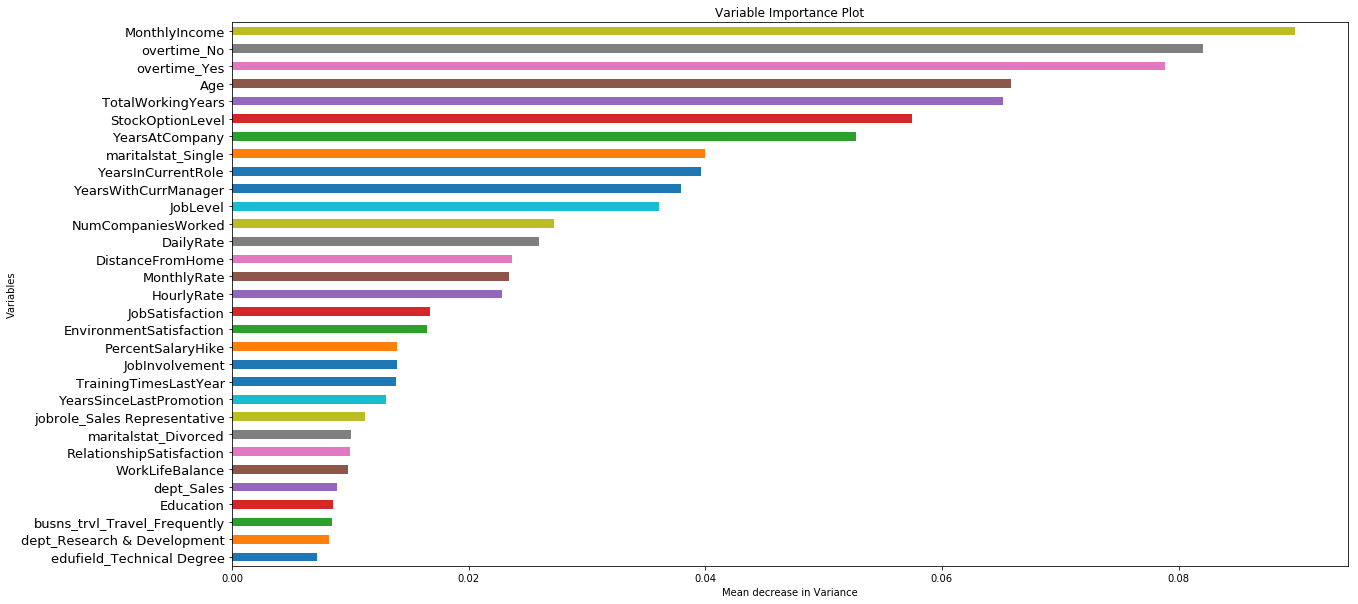

In [42]:
# Plot of variable imoprtance by mean decrease in gini
model_ranks = pd.Series(rf_fit.feature_importances_, index=X_train.columns,
                       name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name = 'Variables'
top_features = model_ranks.iloc[:31].sort_values(ascending=True, inplace=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax = top_features.plot(kind='barh')
_ = ax.set_title('Variable Importance Plot')
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)

In [65]:
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=5000, test_size=0.3, random_state=42):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        # n_estimators=5000, criterion='gini', max_depth=5, min_samples_split=2,
        # bootstrap=True, max_features='auto', random_state=42, min_samples_leaf=1, 
        # class_weight = {0: 0.3, 1: 0.7}
        # Parameters is important at determining the importances of features..
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state,
                                       criterion='gini', max_depth=5, min_samples_split=2, bootstrap=True,
                                       max_features='auto', min_samples_leaf=1, class_weight={0: 0.3, 1: 0.7})
        
        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(30): # Show only the top 30 features, change to X_train.shape[1] to display all the features 
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
37) MonthlyIncome                  0.089823
26) overtime_No                    0.082077
27) overtime_Yes                   0.078884
28) Age                            0.065810
44) TotalWorkingYears              0.065120
43) StockOptionLevel               0.057430
47) YearsAtCompany                 0.052720
25) maritalstat_Single             0.039953
48) YearsInCurrentRole             0.039645
50) YearsWithCurrManager           0.037980
35) JobLevel                       0.036110
39) NumCompaniesWorked             0.027221
29) DailyRate                      0.025916
30) DistanceFromHome               0.023696
38) MonthlyRate                    0.023413
33) HourlyRate                     0.022821
36) JobSatisfaction                0.016712
32) EnvironmentSatisfaction        0.016450
40) PercentSalaryHike              0.013988
34) JobInvolvement                 0.013918
45) TrainingTimesLastYear          0.013894
49) YearsSinceLastPromotion        0.013030
22) jobrole_Sal

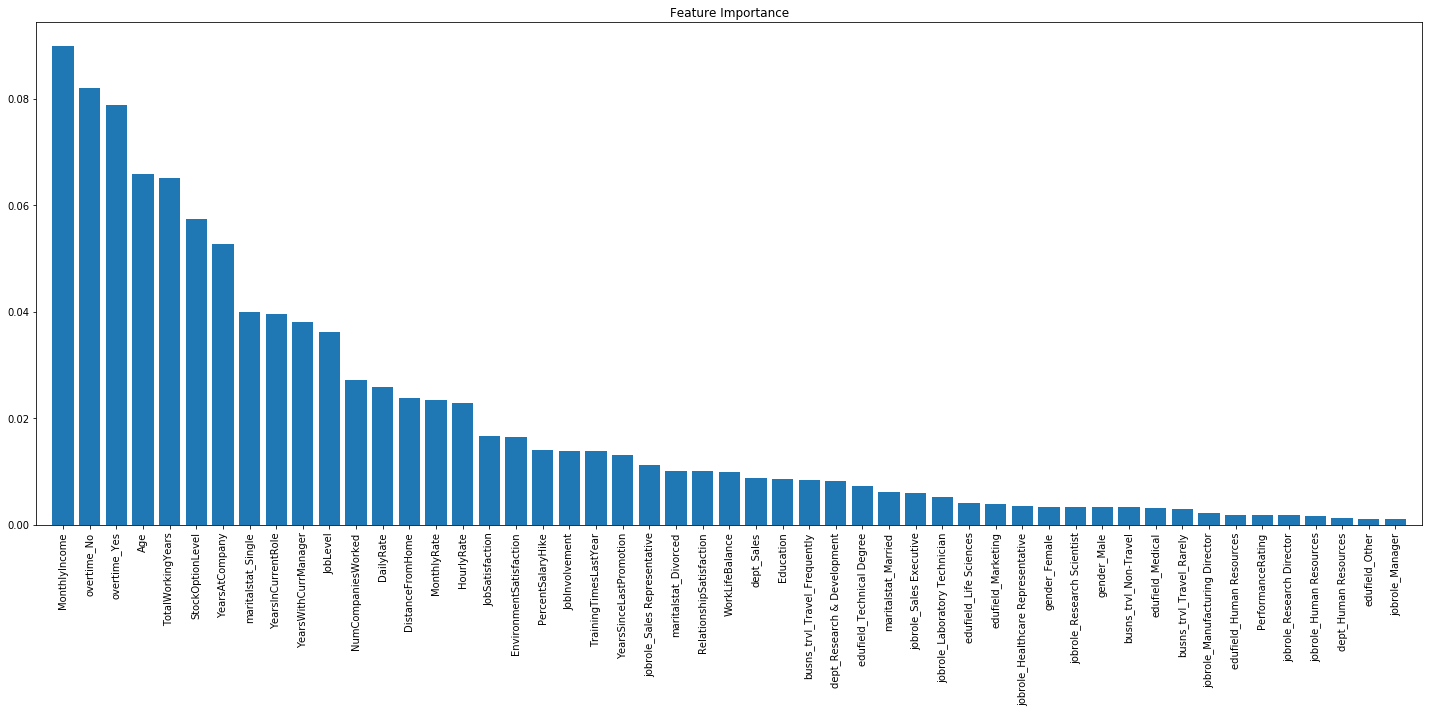

In [66]:
plt.figure(figsize=(20, 10))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X, y)

From the variable importance plot, it seems that the monthly income variable seems to be
most significant, followed by overtime, total working years, stock option levels, years at
company, and so on. This provides us with some insight into what are major contributing
factors that determine whether the employee will remain with the company or leave the
organization: